## Beyond the homoskedasticity assumption 

### Motivation.

First, we specify the **homoskedastic** linear conditional expectation (data-generating) model $p(x,y)$  of the form $y = m(x)+e$ where:

1. $E(y|x) = m(x) = x'\beta$

Note, that  assuming $x$ is ~~two~~one-dimensional, the function $m(x)$ equals to $m(x) = a+bx$. (Why the const. $a$ is still there?)

2. $E(e^2|x) =const$, that  is commonly denoted by $\sigma^2.$

2'. The model is **heteroskedastic** if $E(e^2|x) \neq const$, i.e. depends on $x$. 

In the previous ~~series~~ part of the CodingAssignment you considered the so called "long model". In that model the data generating process  was  homoskedastic (Where to look in code to see this?). 

Quick question: How to modify the vector of regressors to include nonlinear dependencies like $y = x- x^2+x^3+e$?



##### In this section you will consider heteroskedastic models. 


We start with a simple triangular distribution model.





### TASK1: Triangular distribution.

Consider a triangular, with vertices A(0,0),B(1,0) and C(1,1). Let $p(x,y)$ denote a uniform distribution on this triangle.  

1. How to define the density function?

2. What are the mean values  $E(x,y)$ of $x$ and $y$?



It is **not** evident from the inception, that this model is a linear CEF model (it is formulated purely in the context of distributions!).

Show that (HW3)

1. $E(y|x)  = x/2$

2. $var(y|x) = x^2/12 $


Thus, we can write $y = x/2  +e, $ where

$E(e|x)=0, E(e^2|x) = x^2/12$.

First of all run this code:

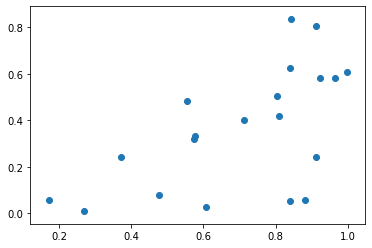

In [26]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

# import sobol_seq


    
def inside_triangle(A, B, C, r1, r2):  ## DON"T CHANGE THIS FUNCTION JUST INITIALIZE!

    if (r1>=r2): # under bisectrissa
        return 1
   
    return 0

def get_sample(A, B, C,  N = 20): # You can change sample size N
   


    seed = 1
    xx = list()
    yy = list()
    random.seed(312345)
    counter = 0
    
    xx = []
    yy = []
    while counter < N:

#         pts, seed = sobol_seq.i4_sobol(2, seed)
#         r1 = pts[0]
#         r2 = pts[1]

        # uncomment if you want standard rng
        r1 = random.uniform(0,1)
        r2 = random.uniform(0,1)

        if inside_triangle(A, B, C, r1, r2):
            xx.append(r1)
            yy.append(r2)
            counter+=1
    return xx,yy

A = (0.0, 0.0)
B = (1.0, 0.0)
C = (1.0, 1.0)

N = 20 # sample size

xx,yy = get_sample(A,B,C, N = 20)

plt.scatter(xx,  yy)
plt.show();

*Is it heteroskedastic?*

Generate several samples from this distribution and plot them. Assuming you don't know the model is heteroskedatic or not (but you know ot has the form $y=x\beta+e$ for some e), how can you suspect that homoskedasticity assumption is violated?

In [27]:
# Hint look at the plot!
# Hint 2: project y on x , obtain the residuals and plot them!
# Hint 3: project residuals onto x or (better) x^2 does it look like a meningful regression? 
# (we don't discuss testing procesures in this course, but if you know some perform them!)

*Use OLS (ordinary least squares) to estimate the original model*

(20, 2)
beta_hat =  [[-0.09158485]
 [ 0.64836937]]
accuracy =  [[0.09158485]
 [0.14836937]]
(20, 2)


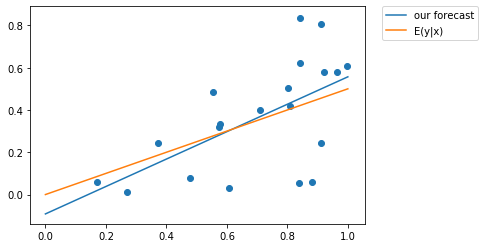

In [28]:
## xx and yy is stored as a list

X = np.array(xx)

X = np.reshape(X, [-1,1]) # reshape as a rectangle n x k matrix (vector-column here)

y = np.array(yy) 

y = np.reshape(y, [-1,1]) # reshape as a vector - column


ones = np.ones_like(X)

X = np.concatenate([ones, X], axis=1)

print(X.shape)

Q = X.T @ X

Qinv = np.linalg.inv(Q)

beta_hat = Qinv @ X.T @ y
beta_ideal = np.array([[0],[1/2]])

print('beta_hat = ', beta_hat)
print('accuracy = ', np.abs(beta_hat - beta_ideal))


## to plot results lets make a grid (i.e. x-s)
x_grid = np.linspace(0,1,N)

ones_grid =  np.ones_like(x_grid.reshape([-1,1])) 
X_grid = np.concatenate([ones_grid, x_grid.reshape([-1,1])], axis=1)
print(X_grid.shape)

y_hat = np.dot(X_grid, beta_hat) # forecast: y_hat = beta1+beta2*x_grid

y_ideal = np.dot(X_grid, beta_ideal) # forecast: y_hat = beta1+beta2*x_grid


plt.plot(x_grid,  y_hat, label="our forecast")
plt.plot(x_grid,  y_ideal, label = "E(y|x)")
plt.scatter(xx,  yy)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.show()







In [29]:
# Hint look at the plot!
# Hint 2: project y on x , obtain the residuals and plot them!
# Hint 3: project residuals onto x or (better) x^2 does it look like a meningful regression? 
# (we don't discuss testing procesures in this course, but if you know some perform them!)

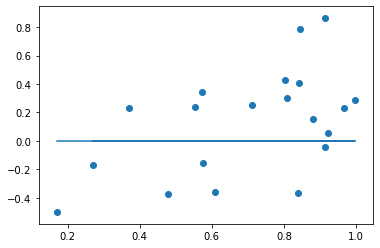

In [30]:
resid = y - y_hat

plt.scatter(X[:,1],  resid.flatten());
plt.plot(X[:,1], np.zeros_like(resid.flatten()));

(0.3203548119346479, 0.08333333333333333)

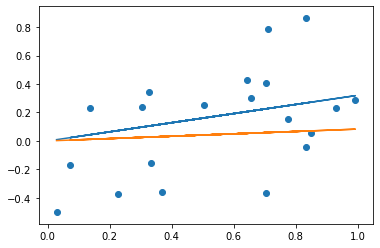

In [31]:
resid = y - y_hat

#proj resid on x^2
X_sq = (X[:, 1] ** 2.0).reshape(-1,1)
beta_res = np.linalg.inv(X_sq.T @ X_sq) @ X_sq.T @ resid

plt.scatter(X_sq,  resid.flatten());
plt.plot(X_sq,  np.dot(X_sq, beta_res).flatten());
plt.plot(X_sq,  X_sq / 12);

beta_res[0][0], 1/12

(0.23360761292618262, 0.08333333333333333)

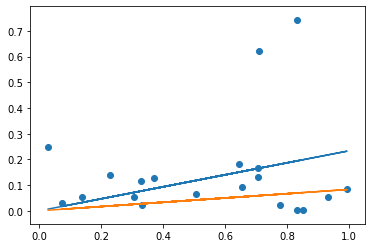

In [32]:
resid = (y - y_hat) ** 2.0

#proj resid on x^2
X_sq = (X[:, 1] ** 2.0).reshape(-1,1)
beta_res = np.linalg.inv(X_sq.T @ X_sq) @ X_sq.T @ resid

plt.scatter(X_sq,  resid.flatten());
plt.plot(X_sq,  np.dot(X_sq, beta_res).flatten());
plt.plot(X_sq,  X_sq / 12);

beta_res[0][0], 1/12

(0.2016421269509534, 0.08333333333333333)

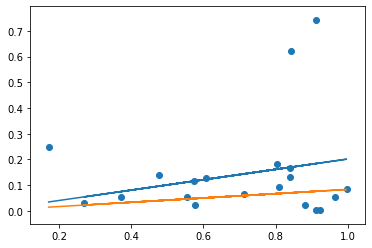

In [33]:
resid = (y - y_hat) ** 2.0

#proj resid on x^2
X_sq = (X[:, 1]).reshape(-1,1)
beta_res = np.linalg.inv(X_sq.T @ X_sq) @ X_sq.T @ resid

plt.scatter(X_sq,  resid.flatten());
plt.plot(X_sq,  np.dot(X_sq, beta_res).flatten());
plt.plot(X_sq,  X_sq / 12);

beta_res[0][0], 1/12

Use WeightedOLS:

$\hat{\beta}_{gls} = (X'\Omega^{-1} X)^{-1}(X'\Omega^{-1} y)$

Note, that in practice You usually do not know the matrix $\Omega$

(20, 2)
beta_hat_gls =  [[-0.06840924]
 [ 0.61154831]]
realized accuracy =  [[0.06840924]
 [0.11154831]]


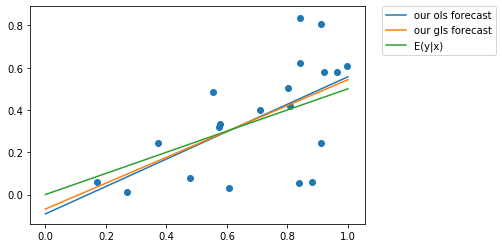

In [34]:
X = np.array(xx)

X = np.reshape(X, [-1,1]) # reshape as a rectangle n x k matrix (vector-column here)

y = np.array(yy) 

y = np.reshape(y, [-1,1]) # reshape as a vector - column


ones = np.ones_like(X)

X = np.concatenate([ones, X], axis=1)

print(X.shape)

Omega = np.zeros([N,N])

for n in range(0,N):
    Omega[n,n] = xx[n]**2/12

Omega_inv = np.linalg.inv(Omega)
Q = np.linalg.multi_dot([X.transpose(),Omega_inv, X])

Qinv = np.linalg.inv(Q)

beta_hat_gls = Qinv @ (X.T @ Omega_inv @ y)
beta_ideal = np.array([[0],[1/2]])

print('beta_hat_gls = ', beta_hat_gls)
print('realized accuracy = ', np.abs(beta_hat_gls - beta_ideal))


y_hat_gls = np.dot(X_grid, beta_hat_gls) # forecast: y_hat = beta1+beta2*x_grid


y_ideal = np.dot(X_grid, beta_ideal) # forecast: y_hat = beta1+beta2*x_grid

plt.plot(x_grid,  y_hat, label="our ols forecast")
plt.plot(x_grid,  y_hat_gls, label="our gls forecast")
plt.plot(x_grid,  y_ideal, label = "E(y|x)")
plt.scatter(xx,  yy)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.show()



Feasible WeightedOLS: you don't know $\Omega$, replace it with $\hat{\Omega}$, with i-th diagonal entry equal to some function  $g(x_i)$. If you are clever enough you'll take $g(x_i)= x_i^2.$ But in genenral you need to find functional form of $g$ directly from the data.  



In [35]:
#### TODO
Omega_hat = np.eye(len(xx)) * np.square(xx)

Finally, we return to the OLS estimator  $\hat{\beta}$. In this part you need to find different versions of
heteroskedaticity corrected (heteroskedaticity robust) covariance matrices for the random vector $\hat{\beta}$. See hansen for the details! 

In [36]:
[n,k] = X.shape

e_hat = y - y_hat
a=n/(n-k) # correction term

sig2=(np.dot(e_hat.transpose(),e_hat)/(n-k))[0, 0]

u1=np.multiply(X,np.dot(e_hat,np.ones([1,k])))

## TODO

leverage = np.diag(X @ np.matrix(X.T @ X).I @ X.T).reshape(-1,1)

# u2=x.*((e./sqrt(1-leverage))*ones(1,k))

u2 = np.multiply(X, (e_hat / np.sqrt(1 - leverage) * np.ones([1,k])))

# u3=x.*((e./(1-leverage))*ones(1,k));

u3 = np.multiply(X, (e_hat / (1 - leverage) * np.ones([1,k])))

Qinv=np.linalg.inv(np.dot(X.transpose(),X))

v0=Qinv*sig2

v1=Qinv*np.dot(u1.transpose(),u1)*Qinv

## TODO
# v1a=a*Qinv*(u1’*u1)*Qinv;

v1a = a * Qinv * np.dot(u1.T, u1) * Qinv

# v2=Qinv*(u2’*u2)*Qinv;

v2 = Qinv * np.dot(u2.T, u2) * Qinv

# v3=Qinv*(u3’*u3)*Qinv;

v3 = Qinv * np.dot(u3.T, u3) * Qinv

# s0=sqrt(diag(v0)); # Homoskedastic formula

s0 = np.sqrt(np.diag(v0))

# s1=sqrt(diag(v1)); # HC0 formula

s1 = np.sqrt(np.diag(v1))

# s1a=sqrt(diag(v1a)); # HC1 formula

s1a = np.sqrt(np.diag(v1a))

# s2=sqrt(diag(v2)); # HC2 formula

s2 = np.sqrt(np.diag(v2))

# s3=sqrt(diag(v3)); # HC3 formula"

s3 = np.sqrt(np.diag(v3))

In [37]:
v1

array([[0.73861805, 0.90389036],
       [0.90389036, 1.49392933]])

In [38]:
v0

array([[ 0.08221901, -0.105408  ],
       [-0.105408  ,  0.15018302]])

### TASK 2.  Chinese Covid-19 Data


In this task you are suggested to apply learned techniques to the Chinese COVID-19 data. Actually our approach doesn't fit time-series data very good (in contrast to the cross-sectional data we started with, underling distribution (called stochastic process here) is ususally more complicated. For instance, notion of i.i.d. sampling has no sense here). However, you can still use OLS estimates if the data-generating process is linear in time $y_t = \beta x_t +e_t,$ $t $ is the time index, and under some assumptions, ols-estimates $\hat{\beta}$ converge in probability to the true values $\beta$. This would be the major topic of your time series course next year. 

We assume that underling model can be descibed by the following differential equation:

$y' = ay(t)\big(b-y(t)\big)+e(t)$

where error term $e(t)$ is a stationary zero mean process (I don't describe this term here, look at https://en.wikipedia.org/wiki/Stationary_process, if you want. I only stress here, that stationarity assumption implies homoskedasticity of $e$). This model is known as the logistic model. In fact it is an oversimplified version of some more evolved epidimiologic models like SIR or SEIR (see https://www.idmod.org/docs/hiv/model-seir.html, https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology and refs on original papers over there).

1. Solve this model (forecast equation $y' = ay(t)(b-y(t))$). Find the formula for the forecast depending on $a$ and $b$.

2. compare it with solutions of $y' = a y(t)$
3. Write down the linear model  $y'  =  ab\cdot y-a \cdot y^2 + e = \beta_1\cdot y+ \beta_2 \cdot y^2 + e$ 

Under some assumptions (zero-mean +stationary errors $e$ and nonstationary $y$ ) on error term $e$ parameters $\beta_i$ are identifiable. Of course, in principle, one should test such assumptions. We take them for granted.


Read data:


In [15]:
import pandas as pd

#df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_confd = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

df_confd_latest=df_confd.drop(df_confd.columns[4:len(df_confd.columns)-1], axis='columns')

df_confd_latest.columns = [*df_confd_latest.columns[:-1],'Confirmed']

# |df.head()
china_df = df_confd.loc[df_confd["Country/Region"] == 'China']
china_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,580,580,582,584,585,586,587,587,588,588
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,343,345,345,349,350,350,350,351,351,351
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,138,138,138,138,138,138,139,139,139,139


In [16]:

china_df_short = china_df.drop(['Province/State', 'Country/Region', 'Lat',  'Long'], axis =1)

china_df_regions_np = china_df_short.to_numpy()

china_df_regions_np.max()


china_df_regions_np_time  = np.sum(china_df_regions_np, axis = 0)



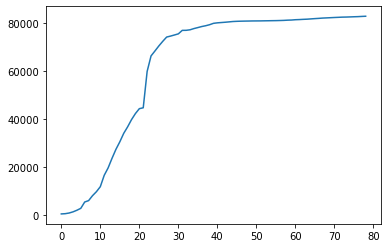

In [17]:
plt.plot(china_df_regions_np_time)

y = china_df_regions_np_time # this is your data

TODO:

1. Estimate the linear model for $y'\approx y(t+1)-y(t)$.

2. Find (in fact, this is the method of moments coefficients $a$ and $b$).

3. [!!!!] Interpret the coefficients $a$ and $b$. It is more natural to interpret $y' = r(1-y(t)/K)y(t)$ for some consants $r$ and $K$, where $r$ is the growth rate and $K$  is the carrying capacity (google it somewhere!).

4. Plot the forecast $\hat{y}(t)$ together with the original data.

5. What do you think about homoskedasticity of the error term $e$?

1. Model Estimation

In [18]:
# Write your code here

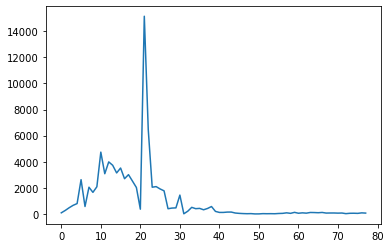

In [19]:
y_acute = np.diff(y)
X_1 = y[:y_acute.shape[0]].reshape(-1,1)
X_2 = X_1 ** 2.0
X = np.concatenate([X_1, X_2], axis=1)
plt.plot(y_acute);

2. Find parameters

In [20]:
beta1, beta2 = np.linalg.inv(X.T @ X) @ X.T @ y_acute
a, b = - beta2, - beta1 / beta2
(a, b)

(2.7220870818020133e-06, 81383.04572064412)

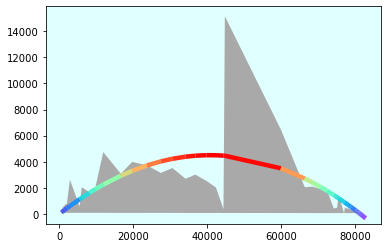

In [107]:
import matplotlib.cm as cm
from matplotlib.collections import LineCollection

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.patch.set_facecolor('lightcyan')

pred = X_1 * beta1 + X_2 * beta2

points = np.array([X_1, pred]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap='rainbow')
lc.set_array(pred.flatten())
lc.set_linewidth(4.5)

ax.fill(X_1, y_acute, 'darkgray')
#ax.plot(X_1, pred);
ax.add_collection(lc);

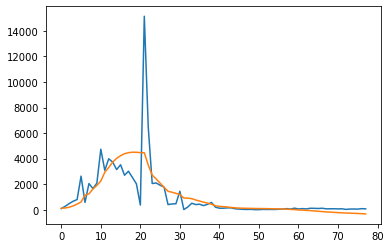

In [22]:
plt.plot(np.arange(X_1.shape[0]), y_acute);
plt.plot(X_1 * beta1 + X_2 * beta2);

3. Explain coefficients

The early, unimpeded growth rate is modeled by the first term <i>+rP</i>. So, growth rate represents increase without any restrictions. In our case restrictions - resistance of people, who start to fight a disease. Coefficient <b>a</b> accounts for division of growth rate and carrying capacity. Together with square of number of diseased people (-<i>rP^2/K</i>) it becomes by module as big as first part term as number of diseased increases. The speed, with which the second term approximates is determined by carrying capacity. With an increase in carrying capacity the speed diminishes. So, we could say that <b>a</b> describes the speed, with which second term converges to the first. So, it is the power of resistance on virus widespreading. With bigger parameter the faster the number of illed people will steep down.

Assuming that <b>a</b> stands for <i>r/K</i>, <i>r</i> = <b>a*b</b>, then <b>b</b> = <i>K</i>. So, <b>b</b> is carrying capacity. I described the meaning of the factor above. So, we can say that <b>b</b> is the purifying parameter, which enhancing the unimpeded growth rate, as it is only associated with the first term. The bigger the parameter, the quicker will be growth without any resistance to the illness.

In our case, the limit of sick people is 81383 persons, and a resistance factor is close to zero, so our resistance su**</b>s (suffers). Or the virus is too strong.

4. Calculate y_hat

In [23]:
C = (np.exp(a * b * np.arange(X_1.flatten().shape[0]))*(- 1 / b + 1 / X_1.flatten()))[0]

In [24]:
y_hat = b / (1 + b * C * np.exp(- a * b * np.arange(X_1.flatten().shape[0])))

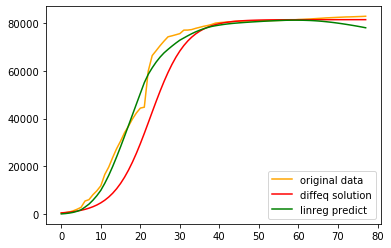

In [25]:
plt.plot(X_1, 'orange', label='original data');
plt.plot(y_hat, 'red', label='diffeq solution');
plt.plot(np.cumsum(X_1 * beta1 + X_2 * beta2), 'green', label='linreg predict');
plt.legend();

5. Estimate homoskedasticity.

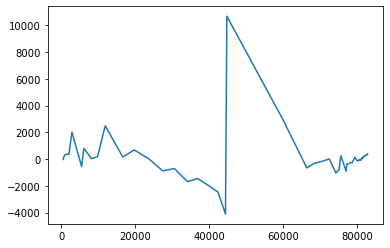

In [26]:
plt.plot(X_1, y_acute - X_1.flatten() * beta1 - X_2.flatten() * beta2);

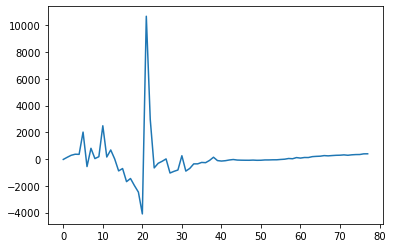

In [27]:
plt.plot(y_acute - X_1.flatten() * beta1 - X_2.flatten() * beta2);

In [28]:
resid = (y_acute - X_1.flatten() * beta1 - X_2.flatten() * beta2) ** 2.0

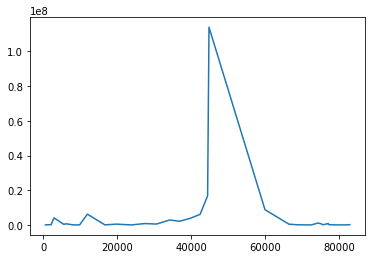

In [29]:
plt.plot(X_1, resid);

22856.752570041346

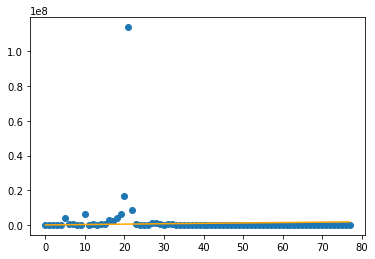

In [40]:
#project residuals squares on t

X_t = np.arange(X_1.flatten().shape[0]).reshape(-1,1)


beta_resid = np.linalg.inv(X_t.T @ X_t) @ X_t.T @ resid

plt.scatter(X_t, resid);
plt.plot(beta_resid * X_t, 'orange');
beta_resid[0]

20.729128107425677

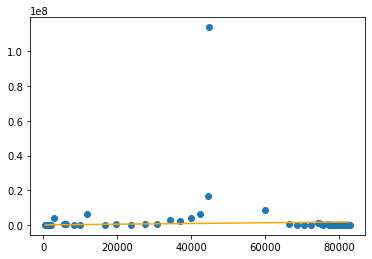

In [34]:
#project residuals squares on x

X_4 = X_1

beta_resid = np.linalg.inv(X_4.T @ X_4) @ X_4.T @ resid

plt.scatter(X_4, resid);
plt.plot(X_4, beta_resid * X_4, 'orange');
beta_resid[0]

0.0001570911676860321

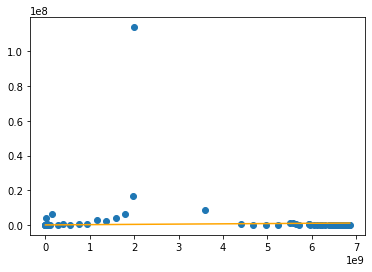

In [41]:
#project residuals squares on x^2

X_2 = X_1 ** 2.0

beta_resid = np.linalg.inv(X_2.T @ X_2) @ X_2.T @ resid

plt.scatter(X_2, resid);
plt.plot(X_2, beta_resid * X_2, 'orange');
beta_resid[0]

1.2061584018571237e-09

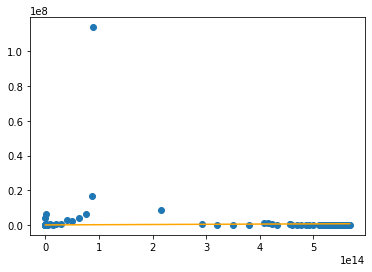

In [42]:
#project residuals squares on x^3

X_3 = X_1 ** 3.0

beta_resid = np.linalg.inv(X_3.T @ X_3) @ X_3.T @ resid

plt.scatter(X_3, resid);
plt.plot(X_3, beta_resid * X_3, 'orange');
beta_resid[0]

9.615714252593806e-15

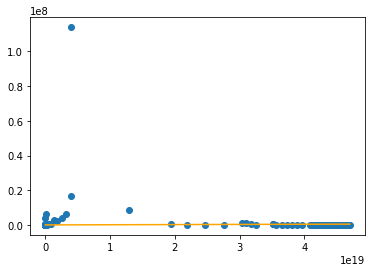

In [36]:
#project residuals squares on x^4

X_4 = X_1 ** 4.0

beta_resid = np.linalg.inv(X_4.T @ X_4) @ X_4.T @ resid

plt.scatter(X_4, resid);
plt.plot(X_4, beta_resid * X_4, 'orange');
beta_resid[0]

As we see, residuals square depends on regressor and largely depends on time variable, which is an underlying regressor. So, I can guess that error term is heteroskedasticic.